In [1]:
import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt

In [2]:
DIRECTORY = r"C:\Users\mahmo\Documents\Final_Year_Project\Tomato_Data_Set"

In [3]:
CATEGORIES = ['Tomato___Bacterial_spot','Tomato___Early_blight','Tomato___Late_blight','Tomato___Leaf_Mold','Tomato___Septoria_leaf_spot',
             'Tomato___Spider_mites Two-spotted_spider_mite','Tomato___Target_Spot','Tomato___Tomato_Yellow_Leaf_Curl_Virus','Tomato___Tomato_mosaic_virus',
             'Tomato___healthy']

In [4]:
data = []

for categories in CATEGORIES:
    folder = os.path.join(DIRECTORY,categories)
    label = CATEGORIES.index(categories)
   # print(folder)
    
    for img in os.listdir(folder):
        img = os.path.join(folder,img)
        #print(img)
        img_arr = cv2.imread(img)
        img_arr = cv2.resize(img_arr,(256,256))
        #print(img_arr)
        #plt.imshow(img_arr)
        #break
        data.append([img_arr,label])

In [5]:
data

[[array([[[166, 166, 172],
          [164, 164, 170],
          [168, 168, 174],
          ...,
          [106, 105, 115],
          [117, 116, 126],
          [128, 127, 137]],
  
         [[167, 167, 173],
          [162, 162, 168],
          [163, 163, 169],
          ...,
          [133, 132, 142],
          [146, 145, 155],
          [133, 132, 142]],
  
         [[172, 172, 178],
          [164, 164, 170],
          [162, 162, 168],
          ...,
          [110, 109, 119],
          [120, 119, 129],
          [137, 136, 146]],
  
         ...,
  
         [[158, 157, 167],
          [155, 154, 164],
          [157, 156, 166],
          ...,
          [100, 100, 112],
          [120, 120, 132],
          [ 95,  95, 107]],
  
         [[155, 154, 164],
          [150, 149, 159],
          [152, 151, 161],
          ...,
          [106, 106, 118],
          [114, 114, 126],
          [101, 101, 113]],
  
         [[157, 156, 166],
          [153, 152, 162],
          [159, 158, 168

In [6]:
random.shuffle(data) #mixup data

In [7]:
x = [] #image arry
y = [] #label

for features,label in data:
    x.append(features)
    y.append(label)

In [8]:
x = np.array(x) #convet x from list to array
y = np.array(y) #convert y from list to array

In [9]:
x

array([[[[209, 203, 208],
         [206, 200, 205],
         [202, 196, 201],
         ...,
         [176, 169, 176],
         [184, 177, 184],
         [165, 158, 165]],

        [[196, 190, 195],
         [199, 193, 198],
         [202, 196, 201],
         ...,
         [181, 174, 181],
         [225, 218, 225],
         [163, 156, 163]],

        [[195, 189, 194],
         [202, 196, 201],
         [209, 203, 208],
         ...,
         [214, 207, 214],
         [218, 211, 218],
         [228, 221, 228]],

        ...,

        [[141, 134, 149],
         [136, 129, 144],
         [133, 126, 141],
         ...,
         [109, 103, 120],
         [119, 113, 130],
         [109, 103, 120]],

        [[118, 111, 126],
         [ 91,  84,  99],
         [100,  93, 108],
         ...,
         [100,  94, 111],
         [106, 100, 117],
         [ 94,  88, 105]],

        [[105,  98, 113],
         [125, 118, 133],
         [134, 127, 142],
         ...,
         [109, 103, 120],
        

In [10]:
x = x/255

In [11]:
x

array([[[[0.81960784, 0.79607843, 0.81568627],
         [0.80784314, 0.78431373, 0.80392157],
         [0.79215686, 0.76862745, 0.78823529],
         ...,
         [0.69019608, 0.6627451 , 0.69019608],
         [0.72156863, 0.69411765, 0.72156863],
         [0.64705882, 0.61960784, 0.64705882]],

        [[0.76862745, 0.74509804, 0.76470588],
         [0.78039216, 0.75686275, 0.77647059],
         [0.79215686, 0.76862745, 0.78823529],
         ...,
         [0.70980392, 0.68235294, 0.70980392],
         [0.88235294, 0.85490196, 0.88235294],
         [0.63921569, 0.61176471, 0.63921569]],

        [[0.76470588, 0.74117647, 0.76078431],
         [0.79215686, 0.76862745, 0.78823529],
         [0.81960784, 0.79607843, 0.81568627],
         ...,
         [0.83921569, 0.81176471, 0.83921569],
         [0.85490196, 0.82745098, 0.85490196],
         [0.89411765, 0.86666667, 0.89411765]],

        ...,

        [[0.55294118, 0.5254902 , 0.58431373],
         [0.53333333, 0.50588235, 0.56470588]

In [12]:
x.shape

(1359, 256, 256, 3)

In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation

In [14]:
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape[1:],activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10,activation='softmax'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [16]:
model.compile(loss = 'sparse_categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])

In [17]:
history = model.fit(x,y,epochs=50,validation_split= .1)

Epoch 1/50
39/39 [==============================] - 63s 1s/step - loss: 1.2546 - accuracy: 0.7114 - val_loss: 0.9609 - val_accuracy: 0.7868
Epoch 2/50
39/39 [==============================] - 58s 1s/step - loss: 1.0704 - accuracy: 0.7302 - val_loss: 0.9273 - val_accuracy: 0.7868
Epoch 3/50
39/39 [==============================] - 63s 2s/step - loss: 1.0930 - accuracy: 0.7433 - val_loss: 1.0452 - val_accuracy: 0.7941
Epoch 4/50
39/39 [==============================] - 63s 2s/step - loss: 1.0150 - accuracy: 0.7482 - val_loss: 0.8004 - val_accuracy: 0.8015
Epoch 5/50
39/39 [==============================] - 59s 2s/step - loss: 0.9418 - accuracy: 0.7490 - val_loss: 0.8170 - val_accuracy: 0.7941
Epoch 6/50
39/39 [==============================] - 57s 1s/step - loss: 0.9011 - accuracy: 0.7514 - val_loss: 0.7994 - val_accuracy: 0.7721
Epoch 7/50
39/39 [==============================] - 60s 2s/step - loss: 0.8945 - accuracy: 0.7547 - val_loss: 0.7789 - val_accuracy: 0.8088
Epoch 8/50
39/39 [==

In [18]:
history

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

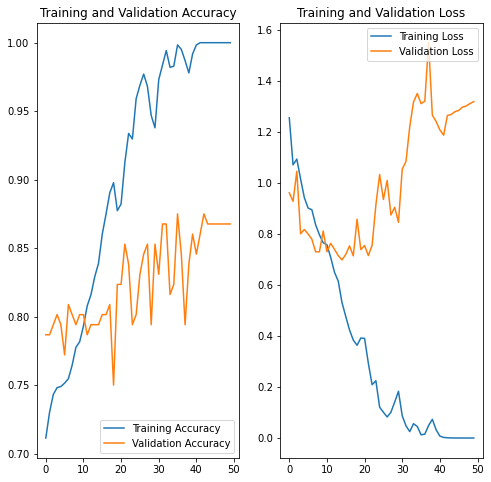

In [21]:
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(50), acc, label='Training Accuracy')
plt.plot(range(50), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(50), loss, label='Training Loss')
plt.plot(range(50), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()